**Introduction**

- Many physical and mathematical systems are based on minimization principles.
- Examples include mechanics, optics, control theory, machine learning, and numerical methods.
- This presentation focuses on quadratic minimization problems and least squares fitting.


**Minimization in Equilibrium Mechanics**

- Consider the function:
 \begin{equation*}
            f(x,y) = 3x^2 - 2xy + 4y^2 + x - 2y + 1.
        \end{equation*}
- The goal is to find $(x^*, y^*)$ that minimizes $f(x, y)$.
- In physics, stable equilibrium corresponds to minimizing potential energy.
- Other examples of minimization principles in physical systems:

  - Mass-spring systems
  - Electrical circuits
  - Solid mechanics and elasticity
  - Fluid mechanics, relativity, and thermodynamics
 
 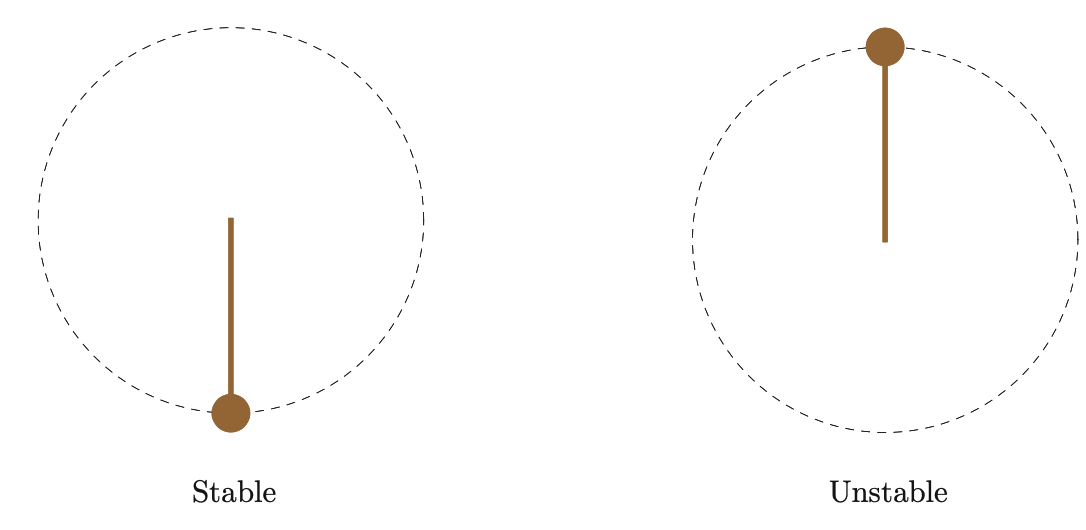


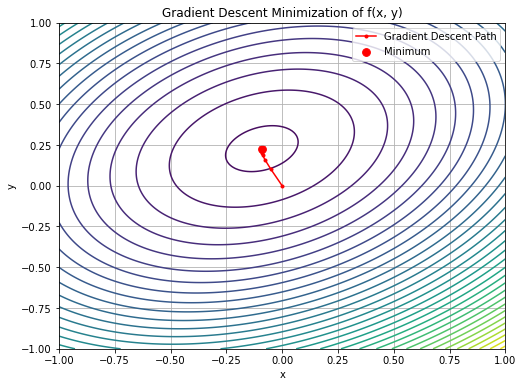

Minimum point (x*, y*): (-0.09090909090914573, 0.2272727272726934)
Minimum value f(x*, y*): 0.7272727272727273


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x, y):
    return 3*x**2 - 2*x*y + 4*y**2 + x - 2*y + 1

# Compute the gradient
def grad_f(x, y):
    df_dx = 6*x - 2*y + 1     # Partial derivative w.r.t. x
    df_dy = -2*x + 8*y - 2    # Partial derivative w.r.t. y
    return np.array([df_dx, df_dy])

# Gradient descent parameters
x, y = 0.0, 0.0   # Starting point
alpha = 0.05      # Learning rate
steps = 100

# Store the path for visualization
path = [(x, y)]

# Perform gradient descent iterations
for i in range(steps):
    grad = grad_f(x, y)
    x, y = x - alpha * grad[0], y - alpha * grad[1]
    path.append((x, y))

# Convert path to arrays for plotting
path = np.array(path)

# Create a grid for contour plot
X = np.linspace(-1, 1, 200)
Y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# Plot the contour and the gradient descent path
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.plot(path[:, 0], path[:, 1], 'r.-', label='Gradient Descent Path')
plt.scatter(path[-1, 0], path[-1, 1], color='red', s=60, label='Minimum')
plt.title('Gradient Descent Minimization of f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("Minimum point (x*, y*):", (x, y))
print("Minimum value f(x*, y*):", f(x, y))


**Minimization for Solving Systems of Equations**

- Consider solving the system:
   \begin{equation*}
            f_1(x) = 0, \quad f_2(x) = 0, \quad \dots, \quad f_m(x) = 0.
        \end{equation*}
- This can be reformulated as a minimization problem:
   \begin{equation*}
            p(x) = f_1^2(x) + f_2^2(x) + \dots + f_m^2(x) = \|f(x)\|^2.
        \end{equation*}
        
- Here, $f(x) = (f_1(x), \dots, f_m(x))^T$ and $\| \cdot \|$ is the Euclidean norm.

- Since $p(x) \geq 0$, minimizing $p(x)$ leads to solving the system.

- The minimum value $p(x^*) = 0$ occurs if and only if $x^*$ is a solution.



**Linear System and Least Squares Minimization**

A linear system
  \begin{equation*}
    A x = b \quad 
  \end{equation*}
consisting of $m$ equations in $n$ unknowns. In this case, the solutions may be obtained by minimizing the function
  \begin{equation*}
    p(x) = \| A x - b \|^2 
  \end{equation*}
  where $\| \cdot \|$ denotes the Euclidean norm on $\mathbb{R}^m\$.


Least squares solution x* = [0.33333333 0.66666667]
Residual (Ax - b) = [ 0.33333333  0.33333333 -0.33333333]
Norm of residual ||Ax - b|| = 0.5773502691896255


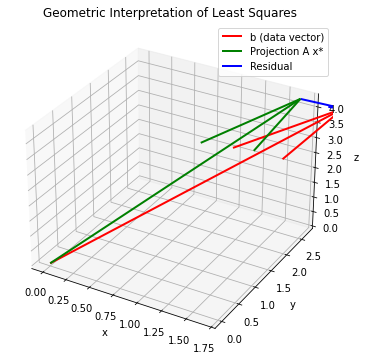

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define matrix A and vector b
A = np.array([[1, 2],
              [2, 3],
              [3, 5]], dtype=float)
b = np.array([2, 3, 4], dtype=float)

# Compute the least squares solution
x_star, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

# Compute the projection of b onto the column space of A
b_proj = A @ x_star

# Print results
print("Least squares solution x* =", x_star)
print("Residual (Ax - b) =", b - A @ x_star)
print("Norm of residual ||Ax - b|| =", np.linalg.norm(b - A @ x_star))

# ----- Visualization -----
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the column space of A (as a plane)
# Generate a grid for visualization
u = np.linspace(-1, 3, 10)
v = np.linspace(-1, 3, 10)
U, V = np.meshgrid(u, v)
W = A[0,0]*U + A[1,0]*V   # Approximate direction (for visual effect, not exact plane)

# Plot the vector b
ax.quiver(0, 0, 0, b[0], b[1], b[2], color='r', linewidth=2, label='b (data vector)')

# Plot its projection (A x*)
ax.quiver(0, 0, 0, b_proj[0], b_proj[1], b_proj[2], color='g', linewidth=2, label='Projection A x*')

# Draw residual (b - Ax*)
residual = b - b_proj
ax.quiver(b_proj[0], b_proj[1], b_proj[2],
          residual[0], residual[1], residual[2],
          color='b', linewidth=2, label='Residual')

# Labels and legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Geometric Interpretation of Least Squares')
ax.legend()
plt.show()


**Least Squares Solution**

Suppose that the linear system does not have a solution. We attempt to find an approximate solution by minimizing the residual vector:
$$
    r = b - A x
$$
  The goal is to minimize the magnitude of the residual,
  
  $\| r \| = \| A x - b \|$.

  The vector $x^\star\$ that minimizes the squared residual norm function is called the **least squares solution**.


**Least Squares as an Approximate Solution**
If the linear system has an actual solution, the least squares solution $x^\star\$ will also satisfy:
$$
    \| A x^\star - b \| = 0
$$
In this case, the least squares solution is identical to the exact solution.

Otherwise, the least squares solution provides the best possible approximation to the solution of the overdetermined system.

**Flexibility in Least Squares Minimization:** The least squares solution depends on the choice of inner product.

**Geometric Interpretation**

- The closest point problem: given $b$, find the closest point $v^*$ in subspace $V$.

- The solution is the orthogonal projection of $b$ onto $V$.
- This is equivalent to solving the least squares problem.
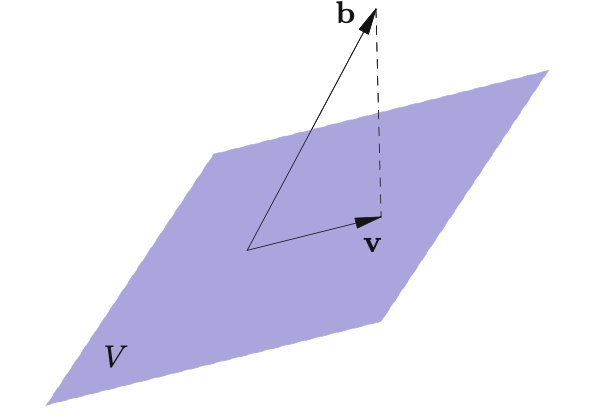

**Minimization in Machine Learning**

- Machine learning models are trained by minimizing a loss function.
- Example: Linear regression minimizes the squared error between predicted and actual values.
- Neural networks use gradient descent to minimize loss functions like cross-entropy or mean squared error.

**Minimization in Data Assimilation**

- Data assimilation combines observational data with model predictions.
- Kalman filtering minimizes the estimation error by updating state estimates using measurements.
- Variational data assimilation minimizes a cost function representing the difference between model predictions and observed data.

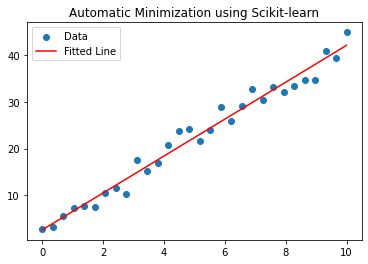

θ0 = 2.5695474193732153
θ1 = 3.954635566935225


In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
# Create 30 evenly spaced values between 0 and 10
x = np.linspace(0, 10, 30).reshape(-1, 1)

# Generate corresponding y values with some random noise
# True relationship: y = 4x + 2 + noise
y = 4 * x.flatten() + 2 + np.random.randn(30) * 2

# Create and train the Linear Regression model
# The model automatically finds the best-fit line that minimizes squared error
model = LinearRegression()
model.fit(x, y)

# Predict the output (y values) using the trained model
y_pred = model.predict(x)

# Plot the data points and the fitted regression line
plt.scatter(x, y, label='Data')                 # Actual data points
plt.plot(x, y_pred, color='red', label='Fitted Line')  # Best-fit line
plt.title("Automatic Minimization using Scikit-learn")
plt.legend()
plt.show()

# Display the learned parameters
print("θ0 =", model.intercept_)    # Intercept term (bias)
print("θ1 =", model.coef_[0])      # Slope (weight for x)

Purpose: Demonstrates automatic minimization using scikit-learn’s built-in LinearRegression.

Minimization Concept: The model minimizes the Mean Squared Error (MSE) between actual $y$ and predicted $y_{pred}$ values.

Output:

- $θ_0$: The intercept (where the line crosses the y-axis).

- $θ_1$: The slope (rate of change of y with respect to x).

Visualization:

- Blue dots = real noisy data.

- Red line = best-fit line minimizing error.

**Conclusion**

- Minimization principles are fundamental in physics and mathematics.
- Least squares is a powerful method for solving inconsistent systems.
- Connections between minimization and geometry lead to efficient numerical techniques.
- Applications span mechanics, machine learning, and data assimilation.